# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.columns = [x.replace(' ','_').lower() for x in data.columns]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
# Categoricals

data.dtypes
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])

categoricals = data.select_dtypes('object')
categoricals = categoricals.drop(['customer'],axis=1)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
# Cleaning from last Lab

# verhicle class -> combine Sports Car, Luxury Car and Luxury SUV

def clean_class(x):
    if x in ['Sports Car', 'Luxury Car', 'Luxury SUV']:
        return 'Luxury'
    else:
        return x
    
categoricals['vehicle_class'] = categoricals['vehicle_class'].apply(clean_class)

# employement status -> employed, unemployed, other

def clean_employment(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']:
        return 'Other'
    else:
        return x
    
categoricals['employmentstatus'] = categoricals['employmentstatus'].apply(clean_employment)

# education -> Master + Doctor -> higher education

def clean_education(x):
    if x in ['Master', 'Doctor']:
        return 'Higher Education'
    else:
        return x
    
categoricals['education'] = categoricals['education'].apply(clean_education)

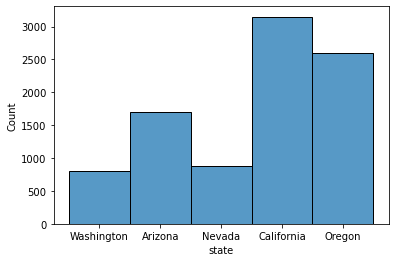

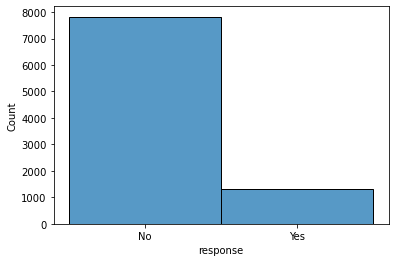

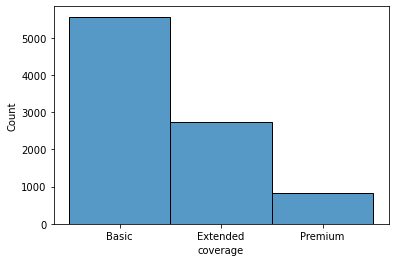

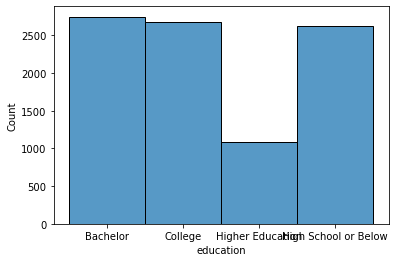

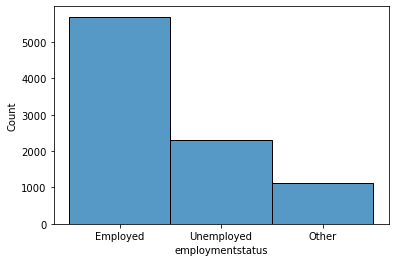

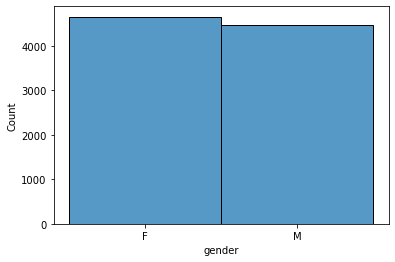

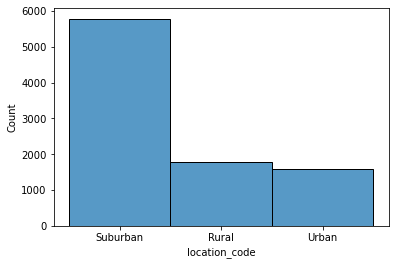

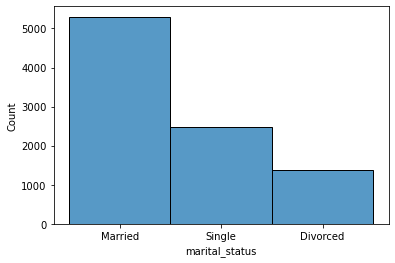

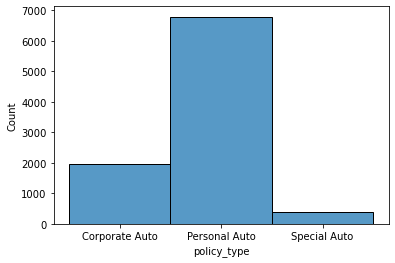

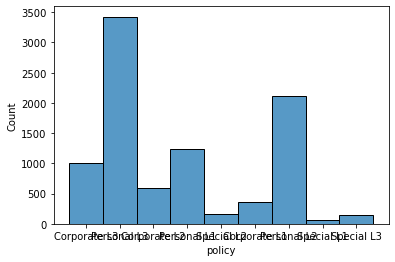

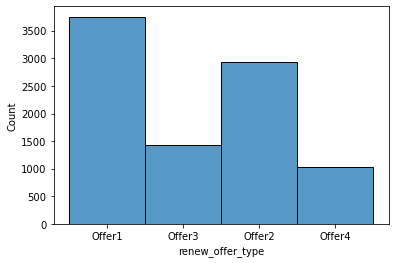

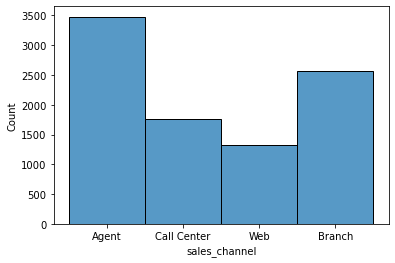

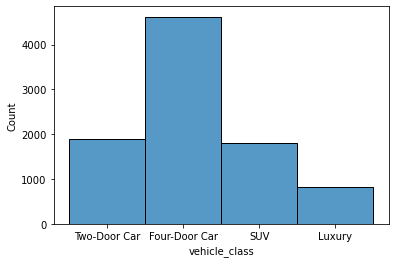

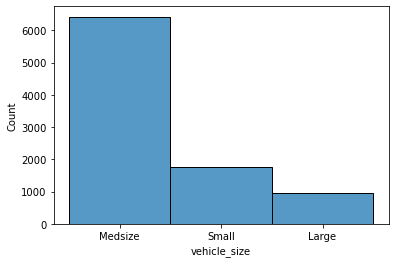

In [23]:
# Plot all the categorical variables with the proper plot. What can you see?

def plot_categoricals(df_cat):
    for col in df_cat.columns:
        plt.figure()
        sns.histplot(x=df_cat[col]) 
        
plot_categoricals(categoricals)

In [16]:
#There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

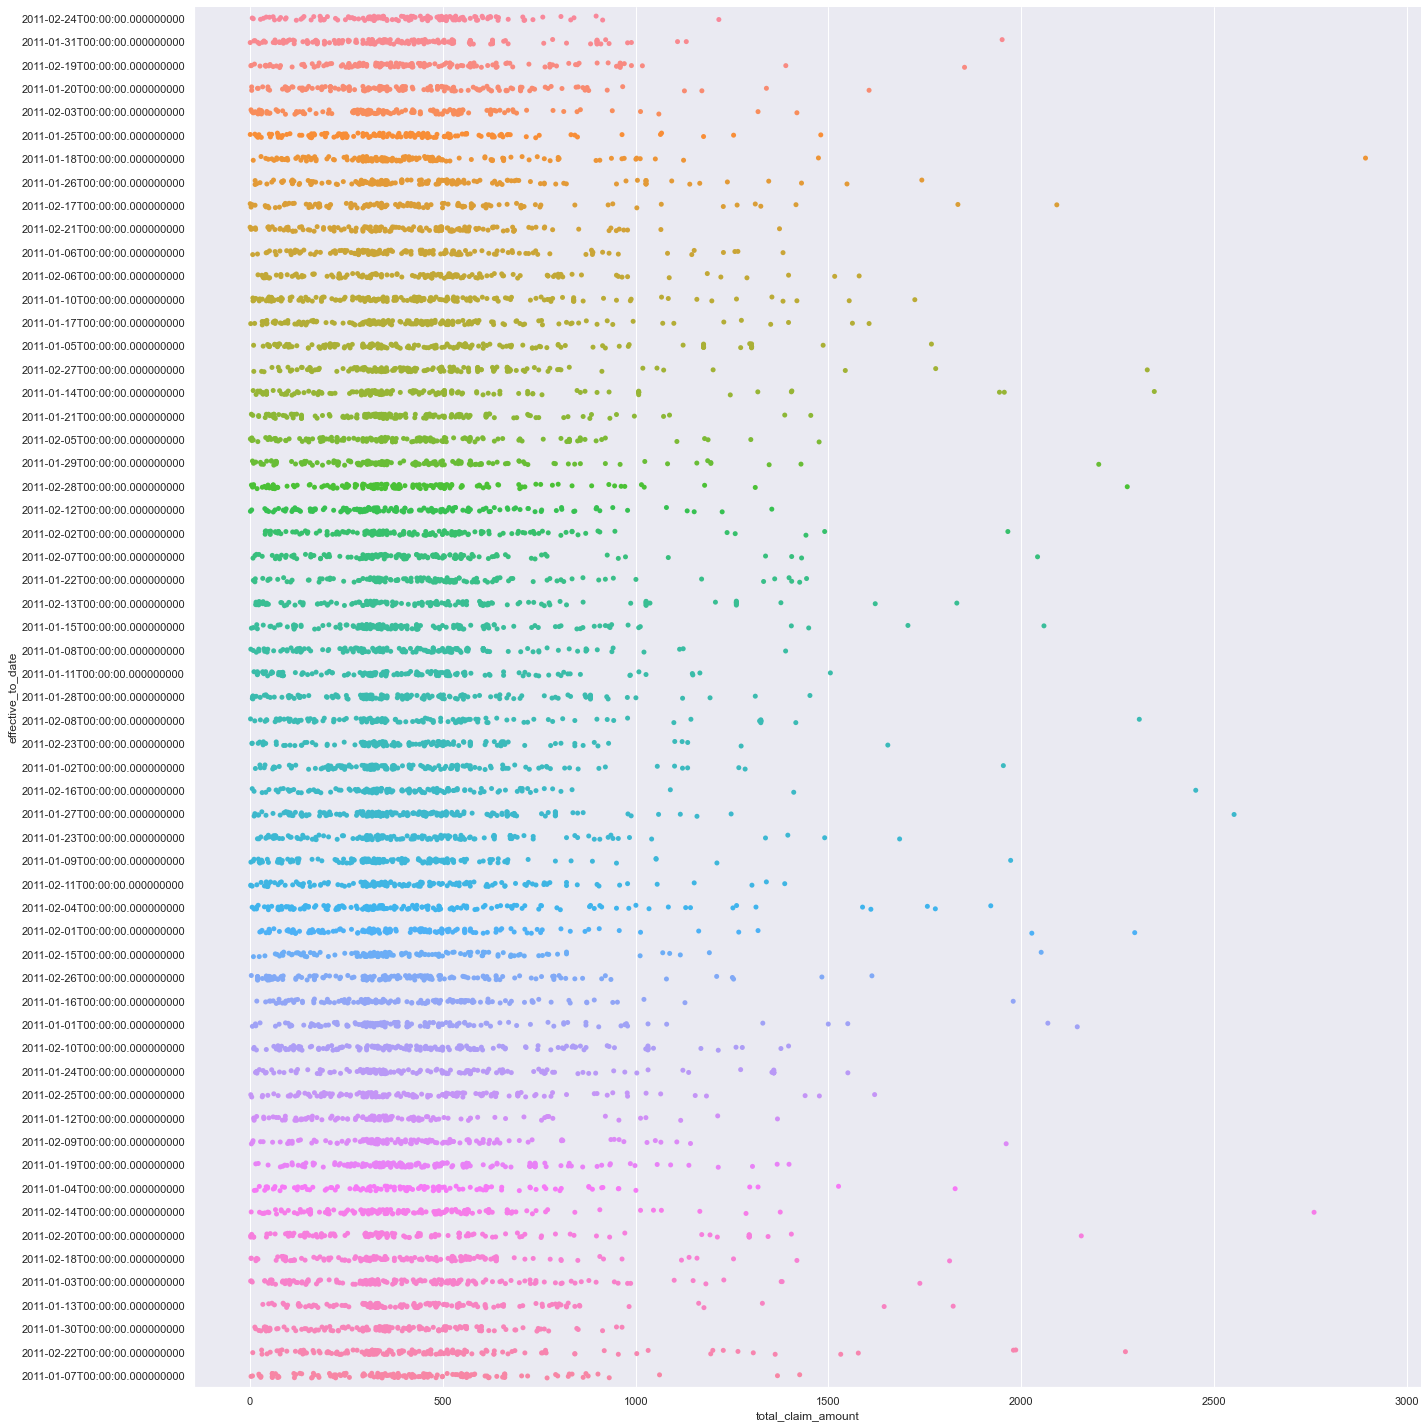

In [50]:
#Plot time variable. Can you extract something from it?

sns.catplot(x='total_claim_amount',y='effective_to_date', data=data, height=20)

In [49]:
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

AttributeError: 'Line2D' object has no property 'height'

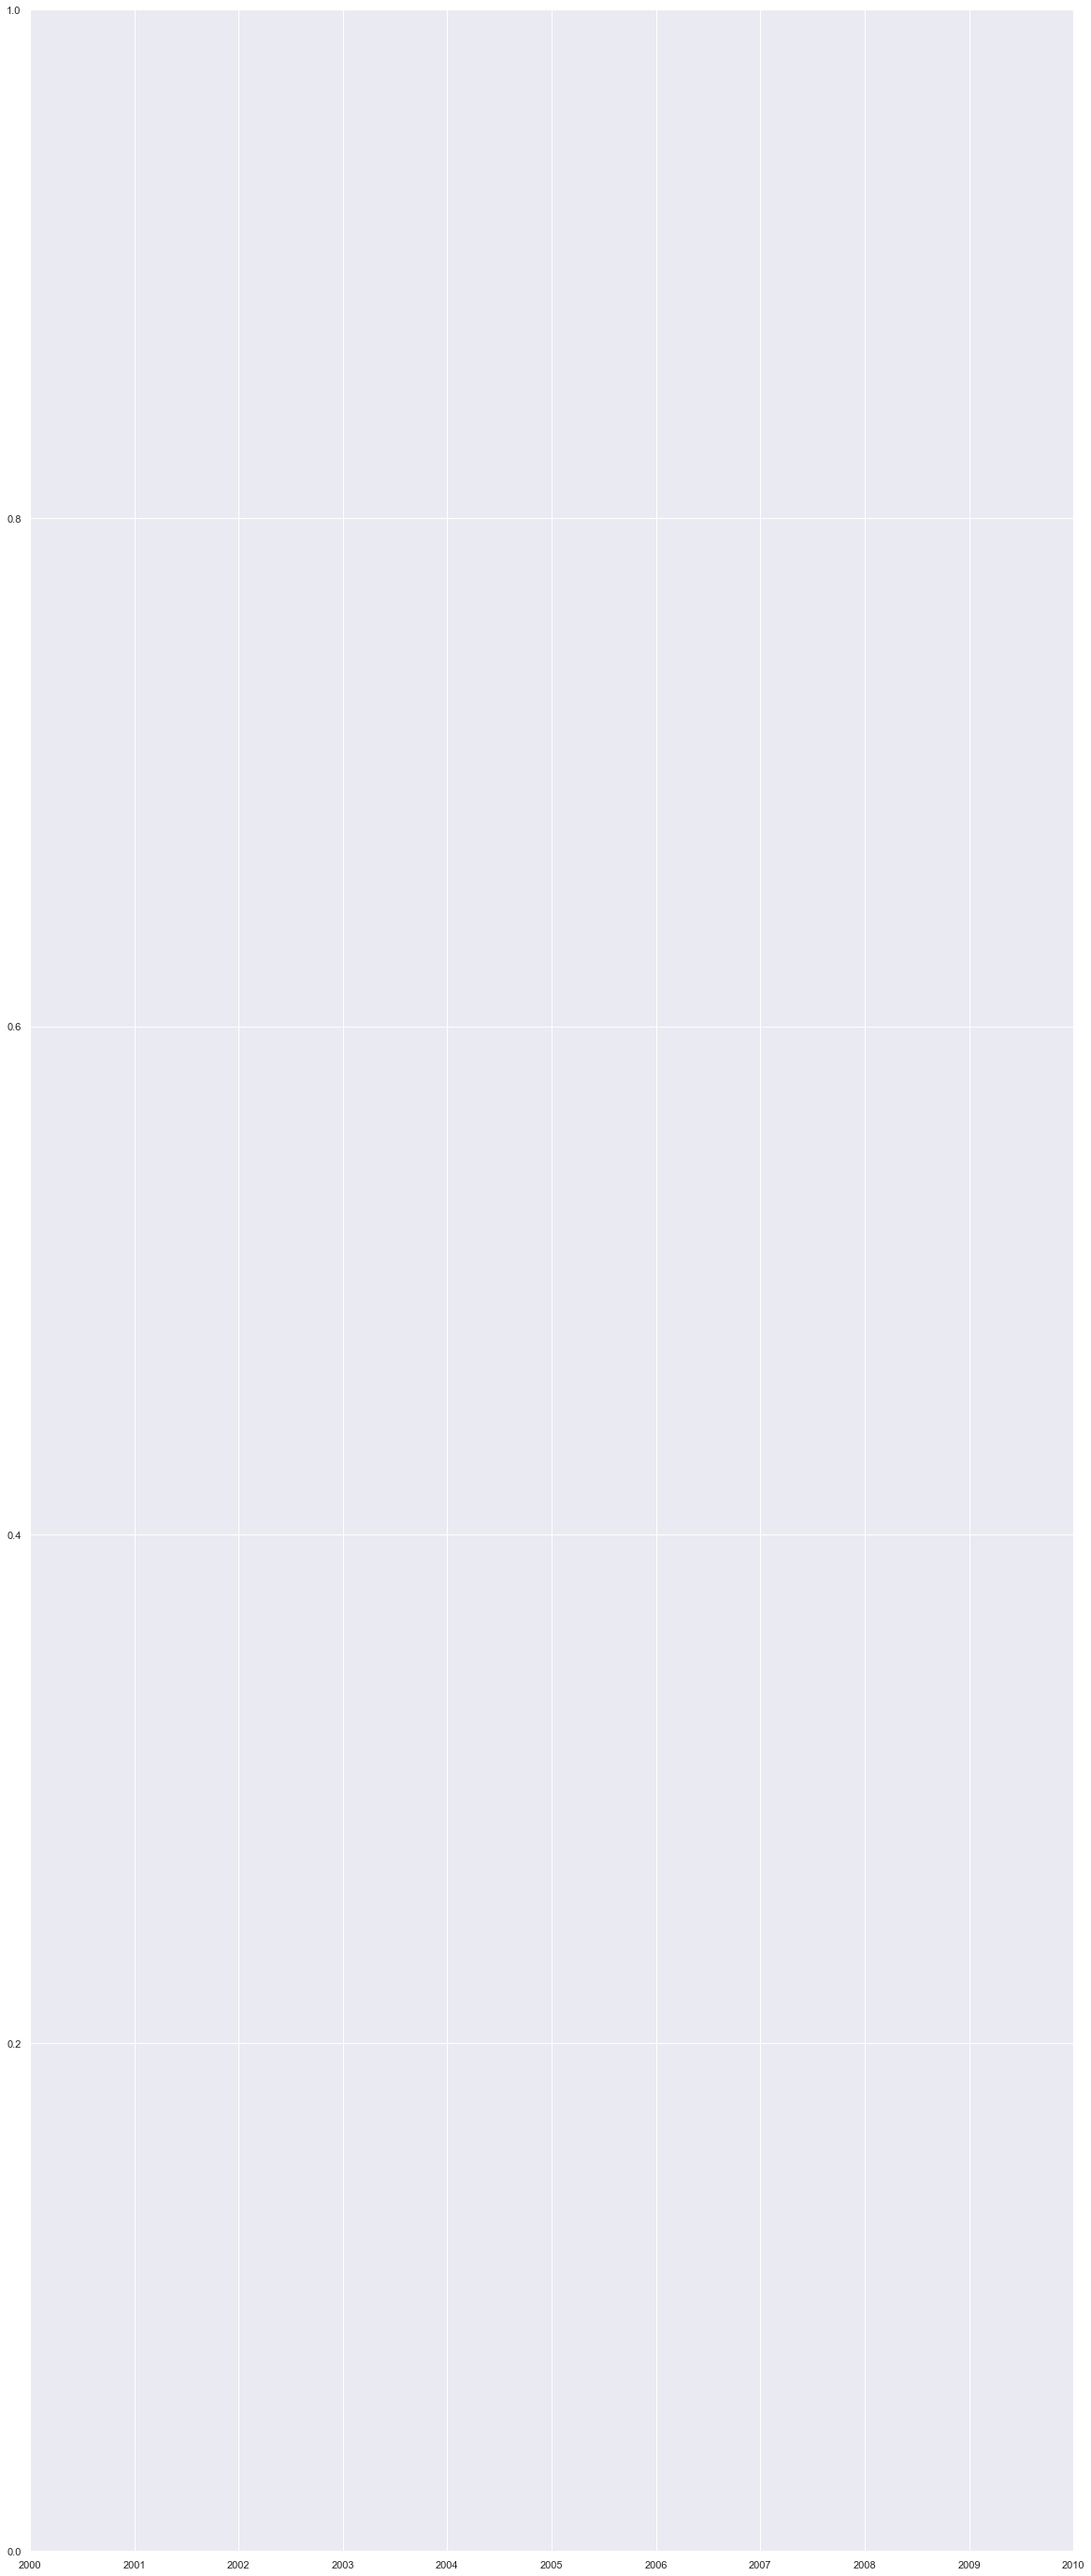

In [51]:
sns.lineplot(x='effective_to_date', data=data, height=20)